In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime 


In [2]:
with open('logins.json') as json_data:
    d = json.load(json_data)

d.keys(),len(list(d.values())[0])



(dict_keys(['login_time']), 93142)

### The JSON file is a dictionary of login times with 93,142 entries

In [3]:
#Converting to Pandas, since I am more comfortable with this format
logins = pd.DataFrame(d)
logins.info() #They are object, not datetime objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null object
dtypes: object(1)
memory usage: 727.8+ KB


In [4]:
logins['login_time'] = pd.to_datetime(logins['login_time'])
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
logins.head(10) #these are not all in chronological order

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [6]:
logins.sort_values(by = 'login_time', inplace = True)
logins['login_time'][0]

Timestamp('1970-01-01 20:13:18')

In [7]:
logins['login_time'].iloc[-1] #The first entry is entered on January 1, 1970 at 8:12:16, and the final is April 13, 2970 at 6:57:38

Timestamp('1970-04-13 18:57:38')

In [8]:
diff = logins['login_time'].iloc[-1] - logins['login_time'][0] 
diff

Timedelta('101 days 22:44:20')

In [9]:
diffmins = diff.total_seconds() /60.0 /15.0 #Between the start and end, there are aroudn 9786 intervals of 15 minutes.
diffmins

9786.955555555556

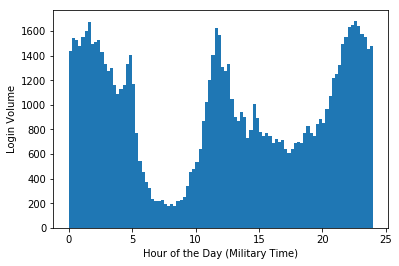

In [10]:
_ = plt.hist([t.hour + t.minute/60.0 for t in logins['login_time']], bins = 96)#96 is how many 15 minute intervals are in a day
_ = plt.xlabel('Hour of the Day (Military Time)')
_ = plt.ylabel('Login Volume')

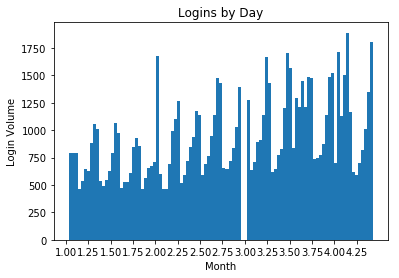

In [20]:
_ = plt.hist([t.month + t.day/30 for t in logins['login_time']], bins = 101) #There are 101 days in the interval
_ = plt.xlabel('Month')
_ = plt.title('Logins by Day')
_ = plt.xticks(np.arange(1,4.5,0.25))
_ = plt.ylabel('Login Volume')

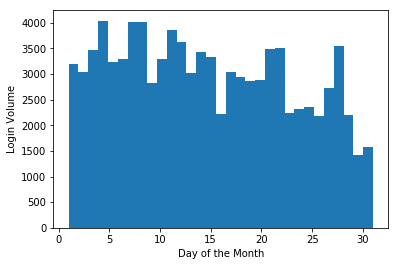

In [16]:
_ = plt.hist([t.day for t in logins['login_time']], bins = 31)
_ = plt.xlabel('Day of the Month')
_ = plt.ylabel('Login Volume')

From the above histogram, there seem to be two dips in Login Volume, that occur at around 7:30 AM and 5:30 PM. One thing to note is that it is not told if the times are given in the native time zone, or in another, as it seems a bit odd that the peaks in logins are at 2 AM and 10 PM. 

There are also peaks that can be seen in the "logins by day" histogram that occur approximately once every quarter of a month, which I would assume is most likely the weekend. One thing off about this visualization is the lack of entries around the end of February. This is caused by the lack of a 30th day in February, so we can essentially pretend that this gap is not there. 

There also seems to be an increase in logins during the month of March and then a decrease again in April, but that is most likely because of the incomplete data in April, which ends at the 13th.  It also seems to be that the beginning of the month has a higher login volume than the end